## Observations and Insights 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_study_df1 = pd.merge(mouse_metadata, study_results, on=['Mouse ID'])

mouse_study_df1.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_number1 = len(mouse_study_df1['Mouse ID'].unique())
mouse_number1

249

In [3]:
mouse_dupes1 = mouse_study_df1[mouse_study_df1.duplicated(['Mouse ID', 'Timepoint'])]

In [4]:
print(mouse_dupes1)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
clean_df = mouse_study_df1.loc[mouse_study_df1['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
mouse_number2 = len(clean_df['Mouse ID'].unique())
mouse_number2

248

## Summary Statistics

In [7]:
tumor_volumes = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

clean_df_mean = tumor_volumes.mean()

clean_df_median = tumor_volumes.median()

clean_df_var = tumor_volumes.var()

clean_df_std = tumor_volumes.std()

clean_df_sem = tumor_volumes.sem()

stat_sum_dict = {
    'Mean Tumor Volume': clean_df_mean,
    'Median Tumor Volume': clean_df_median,
    'Variance of Tumor Volume': clean_df_var,
    'STD of Tumor Volume': clean_df_std,
    'SEM of Tumor Volume': clean_df_sem
}
stat_sum_df = pd.DataFrame(stat_sum_dict)
stat_sum_df

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
tumor_volumes2 = clean_df.groupby('Drug Regimen')

agg_prob = tumor_volumes2.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
agg_prob

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:>

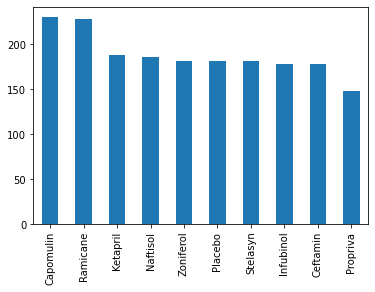

In [9]:
drug_time_count = clean_df['Drug Regimen'].value_counts()

drug_time_count.plot(kind='bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

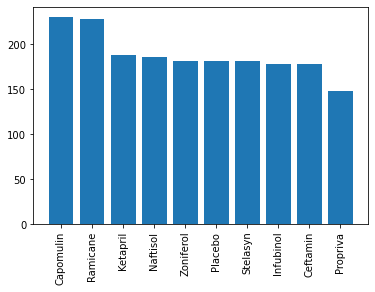

In [10]:
plt.bar(drug_time_count.index.values, drug_time_count.values)

plt.xticks(rotation=90)

<AxesSubplot:ylabel='Sex'>

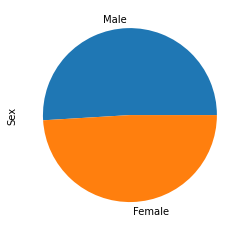

In [11]:
sex_count = clean_df['Sex'].value_counts()
sex_count.plot(kind='pie')

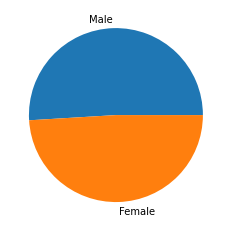

In [12]:
plt.pie(sex_count.values, labels = sex_count.index.values)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
final_tp1 = pd.DataFrame(clean_df.groupby(['Mouse ID'])['Timepoint'].max())

final_tp2 = pd.merge(final_tp1, clean_df, on = ('Mouse ID', 'Timepoint'))
final_tp2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tum_vol_list = []

for regimen in regimen_list:
    
    drug_tumor_rows = final_tp2.loc[final_tp2['Drug Regimen'] == regimen][['Tumor Volume (mm3)']]
    
    tum_vol_list.append(drug_tumor_rows['Tumor Volume (mm3)'])
    
    quartiles = drug_tumor_rows['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outlier_tv = drug_tumor_rows.loc[(drug_tumor_rows['Tumor Volume (mm3)'] < lower_bound) | (drug_tumor_rows['Tumor Volume (mm3)'] > upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca85334910>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca85334f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca853344c0>,
 'medians': [<matplotlib.lines.Line2D at 0x1ca853436d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ca85343a60>,
 'means': []}

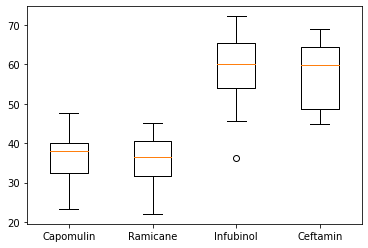

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#drug_tumor_rows.boxplot()
plt.boxplot(tum_vol_list, labels = regimen_list)

## Line and Scatter Plots

In [39]:
cap_df1 = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
#print(cap_df1)

mouse_df = cap_df1.loc[cap_df1['Mouse ID'] == 'b128']

cap_df3 = cap_df1.groupby('Mouse ID').mean()

cap_df2 = mouse_df.groupby('Mouse ID')
print(cap_df2)
#weird timepoint values = 22.5

x_line = mouse_df['Timepoint']

y_line = mouse_df['Tumor Volume (mm3)']

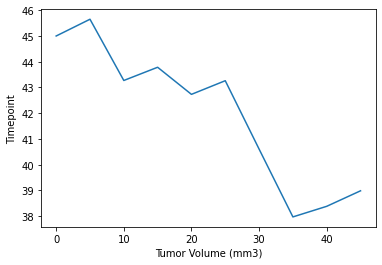

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Timepoint')

plt.plot(x_line, y_line)
plt.show()

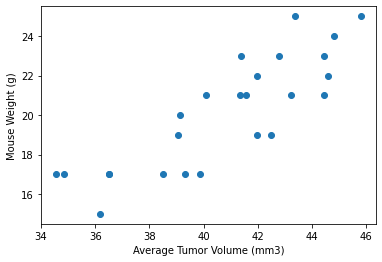

In [41]:
x_scat = cap_df3['Tumor Volume (mm3)']

y_scat = cap_df3['Weight (g)']

plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')

plt.scatter(x_scat, y_scat)

## Correlation and Regression

The correlation between both factors is 0.84
The value of r-squared is: 0.7088568047708723


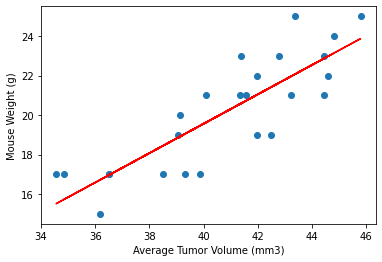

In [42]:
correlation = st.pearsonr(x_scat, y_scat)
print(f'The correlation between both factors is {round(correlation[0],2)}')

(slope, intercept, r, p, se) = st.linregress(x_scat, y_scat)
regress_values = x_scat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_scat,y_scat)
plt.plot(x_scat,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
print(f"The value of r-squared is: {r**2}")
plt.show()